### Ques 1. Write the code for Local Binary Pattern in python (without using its library function) based on the following steps. Share the Colab Link.

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
def thresholding_val(img,centre,x,y):
  val = 0
  try:
    if img[x][y]>=centre:
      val = 1
  except:
      pass
  return val

In [3]:
def lbp_pixel_cal(img,x,y):
  centre = img[x][y]
  binary = []
  binary.append(thresholding_val(img,centre,x-1,y-1)) #top left
  binary.append(thresholding_val(img,centre,x-1,y))   #top
  binary.append(thresholding_val(img,centre,x-1,y+1)) #top right
  binary.append(thresholding_val(img,centre,x,y-1))   #left
  binary.append(thresholding_val(img,centre,x,y+1))   #right
  binary.append(thresholding_val(img,centre,x+1,y-1)) #bottom left
  binary.append(thresholding_val(img,centre,x+1,y))   #bottom
  binary.append(thresholding_val(img,centre,x+1,y+1)) #bottom right

  val = 0
  for i in range(len(binary)):
    val+=binary[i]*2**i

  return val

In [4]:
def local_binary_pattern(img_gray,height,width):
  img_lbp = np.zeros((height,width),np.uint8)
  for i in range(height):
    for j in range(width):
      img_lbp[i][j] =  lbp_pixel_cal(img_gray,i,j)
  return img_lbp

In [5]:
from google.colab.patches import cv2_imshow

### Ques 2. Generate the output image using this code for input images given below

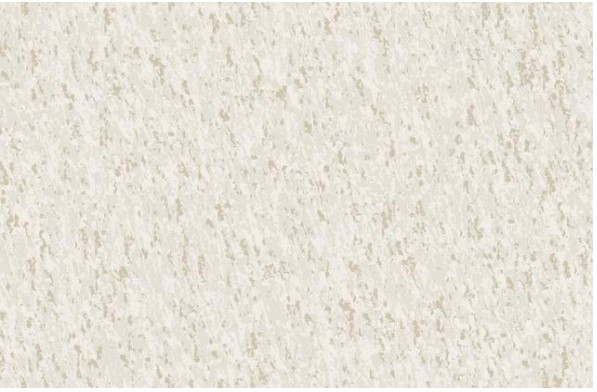

In [9]:
img_bgr = cv2.imread("image.jpg")
cv2_imshow(img_bgr)

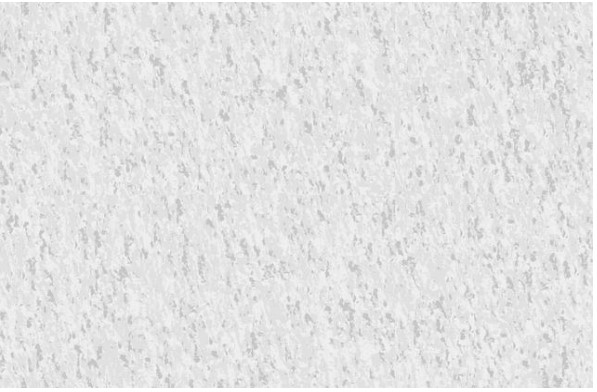

In [10]:
img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [11]:
h1,w1,c = img_bgr.shape

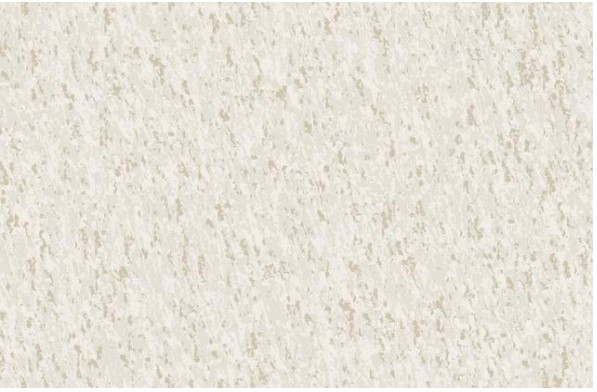

In [12]:
img_1_lbp = local_binary_pattern(img_gray,h1,w1)
cv2_imshow(img_bgr)

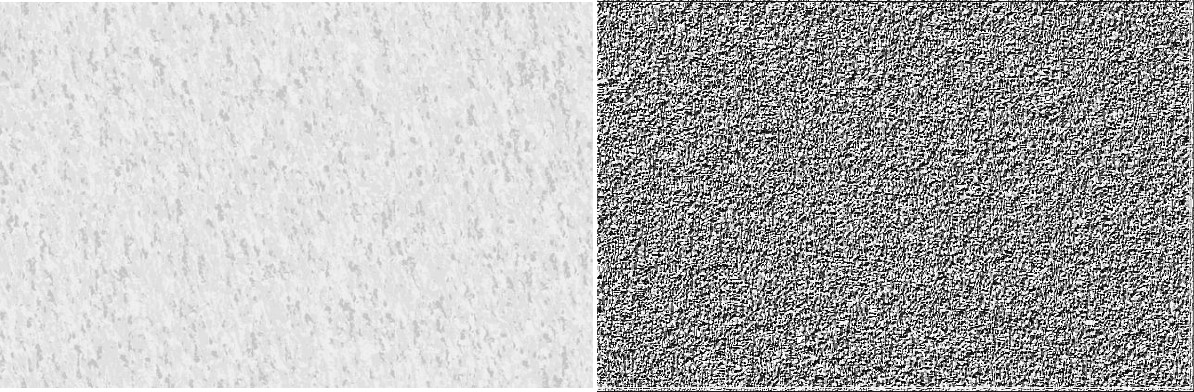

In [13]:
cv2_imshow(np.hstack([img_gray, img_1_lbp]))

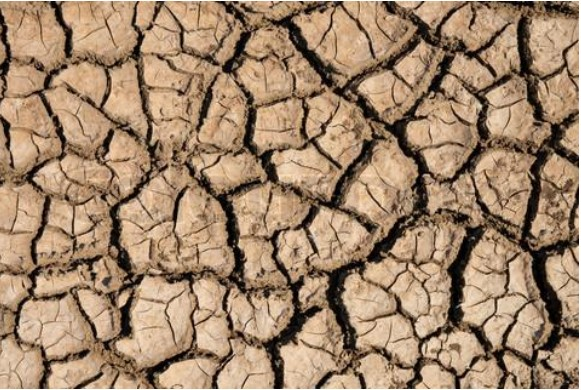

In [15]:
img_2_bgr = cv2.imread("image_1.jpg")
cv2_imshow(img_2_bgr)

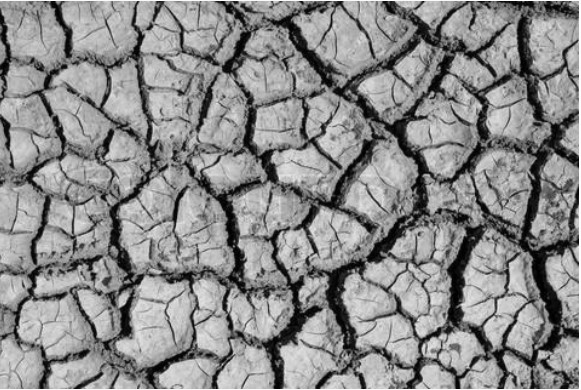

In [16]:
img_2_gray = cv2.cvtColor(img_2_bgr,cv2.COLOR_BGR2GRAY)
cv2_imshow(img_2_gray)

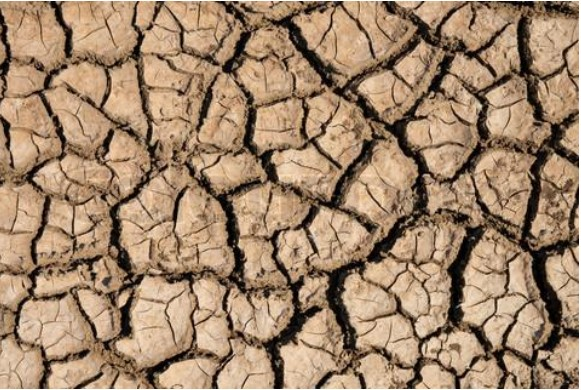

In [17]:
h2,w2,_ = img_2_bgr.shape
img_2_lbf = local_binary_pattern(img_2_gray,h2,w2)
cv2_imshow(img_2_bgr)

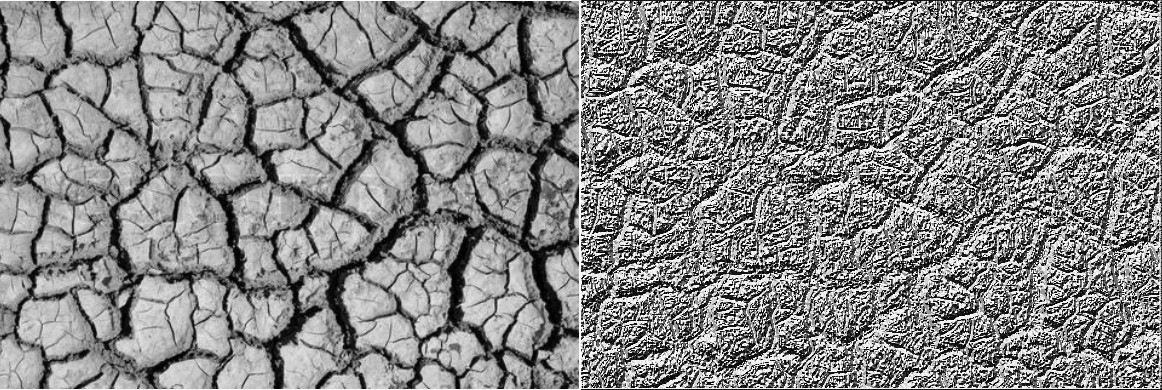

In [18]:
cv2_imshow(np.hstack([img_2_gray, img_2_lbf]))